In [2]:
pip install pandas matplotlib seaborn plotly geopandas folium


In [13]:
# Display the first few rows of the datasets
print("Temperature Data:")
print(temperature_df.head())

print("\nBin Size Data:")
print(bin_size_df.head())


Temperature Data:
            ID  LATITUDE  LONGITUDE  ELEVATION STATE                 NAME  \
0  AE000041196    25.333     55.517       34.0   NaN  SHARJAH INTER. AIRP   
1  AEM00041194    25.255     55.364       10.4   NaN           DUBAI INTL   
2  AEM00041217    24.433     54.651       26.8   NaN       ABU DHABI INTL   
3  AEM00041218    24.262     55.609      264.9   NaN          AL AIN INTL   
4  AFM00040990    31.500     65.850     1010.0   NaN     KANDAHAR AIRPORT   

  GSNFLAG HCNFLAG    WMOID             x             y  \
0     GSN     NaN  41196.0  5.579578e+06  2.816905e+06   
1     NaN     NaN  41194.0  5.567782e+06  2.808232e+06   
2     NaN     NaN  41217.0  5.532707e+06  2.716829e+06   
3     NaN     NaN  41218.0  5.637301e+06  2.697815e+06   
4     NaN     NaN  40990.0  6.243199e+06  3.502645e+06   

                                  x_group  \
0  5497601.479782179 to 5594934.908498545   
1  5497601.479782179 to 5594934.908498545   
2  5497601.479782179 to 5594934.908

In [15]:
# Convert 'Date' column to datetime format
bin_size_df['Date'] = pd.to_datetime(bin_size_df['Date'])

# Check if conversion worked
print(bin_size_df.head())


            ID       Date Element  Data_Value
0  USW00094889 2014-11-12    TMAX          22
1  USC00208972 2009-04-29    TMIN          56
2  USC00200032 2008-05-26    TMAX         278
3  USC00205563 2005-11-11    TMAX         139
4  USC00200230 2014-02-27    TMAX        -106


In [30]:
print(bin_size_df.head())


            ID       Date Element  Data_Value
0  USW00094889 2014-11-12    TMAX          22
1  USC00208972 2009-04-29    TMIN          56
2  USC00200032 2008-05-26    TMAX         278
3  USC00205563 2005-11-11    TMAX         139
4  USC00200230 2014-02-27    TMAX        -106


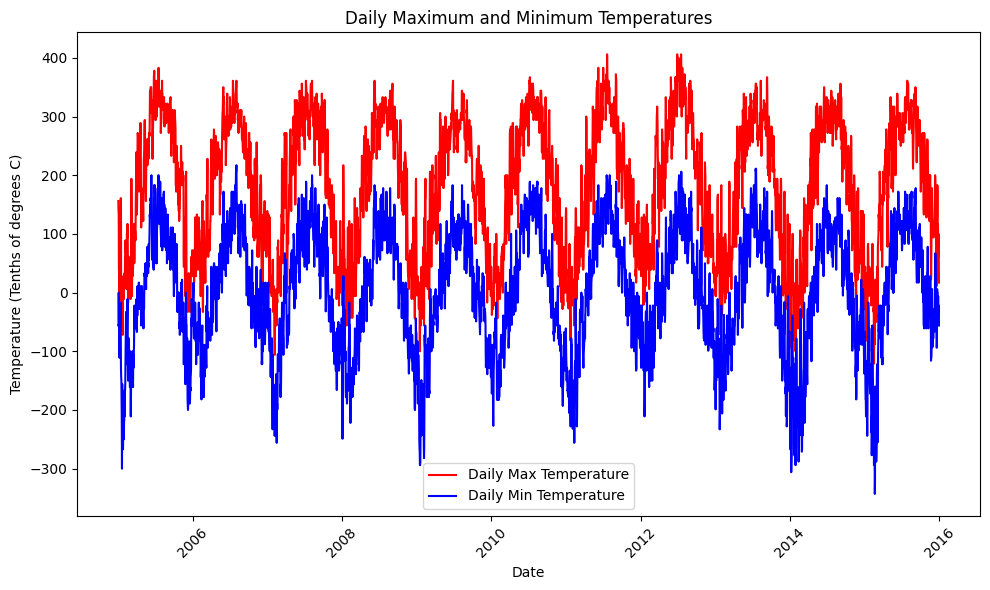

In [31]:
import matplotlib.pyplot as plt

# Plot the daily maximum and minimum temperatures
plt.figure(figsize=(10,6))
plt.plot(daily_temps['Date'], daily_temps['daily_max'], label='Daily Max Temperature', color='red')
plt.plot(daily_temps['Date'], daily_temps['daily_min'], label='Daily Min Temperature', color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Temperature (Tenths of degrees C)')
plt.title('Daily Maximum and Minimum Temperatures')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


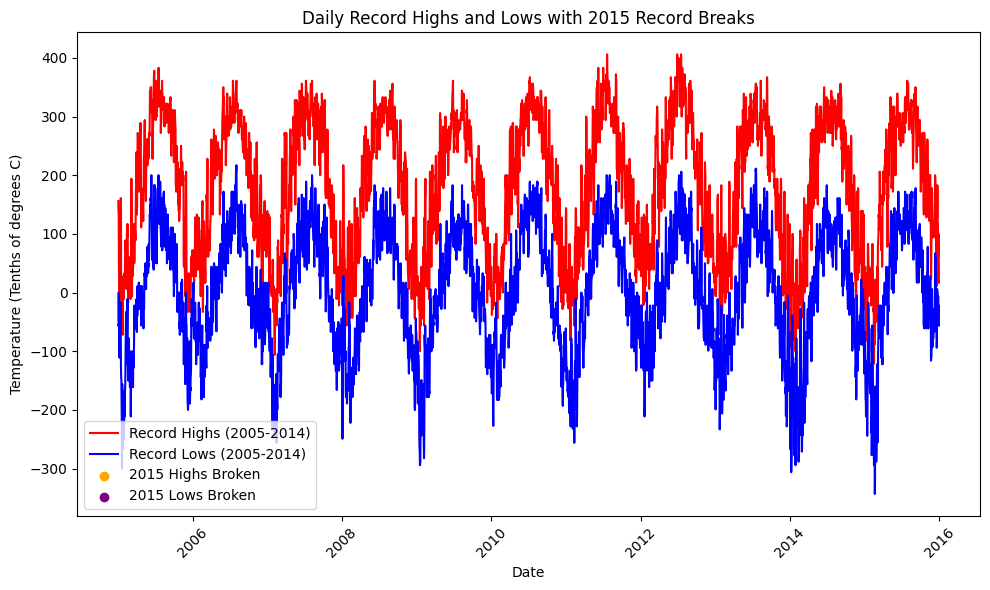

In [32]:
# Filter for 2015 data
data_2015 = bin_size_df[bin_size_df['Date'].dt.year == 2015]

# Merge 2015 data with historical records
record_breaks = pd.merge(data_2015, daily_temps, on='Date')

# Check for records broken in 2015
broken_highs = record_breaks[record_breaks['Data_Value'] > record_breaks['daily_max']]
broken_lows = record_breaks[record_breaks['Data_Value'] < record_breaks['daily_min']]

# Plot record-breaking highs and lows for 2015
plt.figure(figsize=(10,6))
plt.plot(daily_temps['Date'], daily_temps['daily_max'], label='Record Highs (2005-2014)', color='red')
plt.plot(daily_temps['Date'], daily_temps['daily_min'], label='Record Lows (2005-2014)', color='blue')

# Plot record-breaking temperatures in 2015
plt.scatter(broken_highs['Date'], broken_highs['Data_Value'], color='orange', label='2015 Highs Broken')
plt.scatter(broken_lows['Date'], broken_lows['Data_Value'], color='purple', label='2015 Lows Broken')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Temperature (Tenths of degrees C)')
plt.title('Daily Record Highs and Lows with 2015 Record Breaks')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


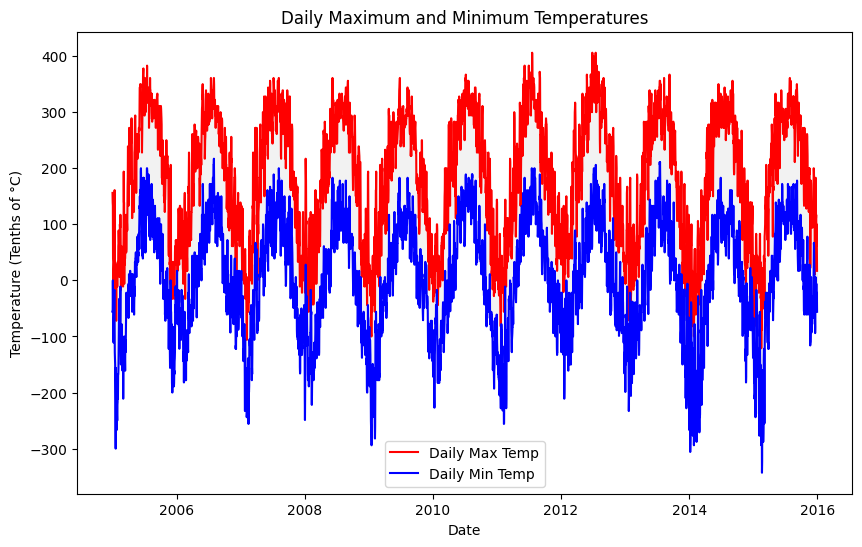

In [33]:
import matplotlib.pyplot as plt

# Plot daily max and min temperatures
plt.figure(figsize=(10, 6))
plt.plot(daily_temps['Date'], daily_temps['daily_max'], label='Daily Max Temp', color='r')
plt.plot(daily_temps['Date'], daily_temps['daily_min'], label='Daily Min Temp', color='b')
plt.fill_between(daily_temps['Date'], daily_temps['daily_min'], daily_temps['daily_max'], color='gray', alpha=0.1)

# Labels and Title
plt.xlabel('Date')
plt.ylabel('Temperature (Tenths of °C)')
plt.title('Daily Maximum and Minimum Temperatures')
plt.legend()

# Show plot
plt.show()


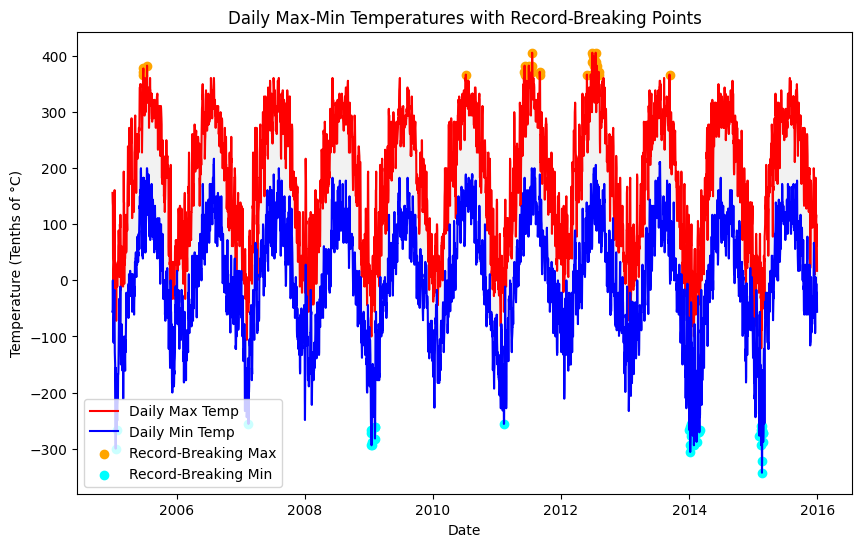

In [34]:
# Assuming 'record_max' and 'record_min' contain boolean flags for record-breaking temperatures

# Plot daily max and min temperatures again
plt.figure(figsize=(10, 6))
plt.plot(daily_temps['Date'], daily_temps['daily_max'], label='Daily Max Temp', color='r')
plt.plot(daily_temps['Date'], daily_temps['daily_min'], label='Daily Min Temp', color='b')
plt.fill_between(daily_temps['Date'], daily_temps['daily_min'], daily_temps['daily_max'], color='gray', alpha=0.1)

# Overlay record-breaking temps (you'll need to define record-breaking logic first)
record_breaking_max = daily_temps[daily_temps['daily_max'] > daily_temps['daily_max'].quantile(0.99)]
record_breaking_min = daily_temps[daily_temps['daily_min'] < daily_temps['daily_min'].quantile(0.01)]

plt.scatter(record_breaking_max['Date'], record_breaking_max['daily_max'], color='orange', label='Record-Breaking Max')
plt.scatter(record_breaking_min['Date'], record_breaking_min['daily_min'], color='cyan', label='Record-Breaking Min')

# Labels and Title
plt.xlabel('Date')
plt.ylabel('Temperature (Tenths of °C)')
plt.title('Daily Max-Min Temperatures with Record-Breaking Points')
plt.legend()

# Show plot
plt.show()
